In [1]:
from discopy import grammar
from pytket.qasm import circuit_to_qasm_str
from pytket.circuit.display import render_circuit_jupyter

from discoket.ccg2discocat import DepCCGParser
from discoket.circuit import IQPAnsatz
from discoket.core.types import AtomicType

N = AtomicType.NOUN
S = AtomicType.SENTENCE

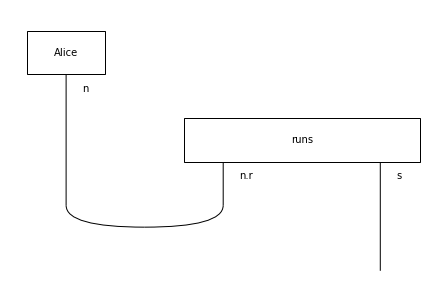

In [2]:
depccg_parser = DepCCGParser()
diagram = depccg_parser.sentence2diagram('Alice runs')
diagram.draw()

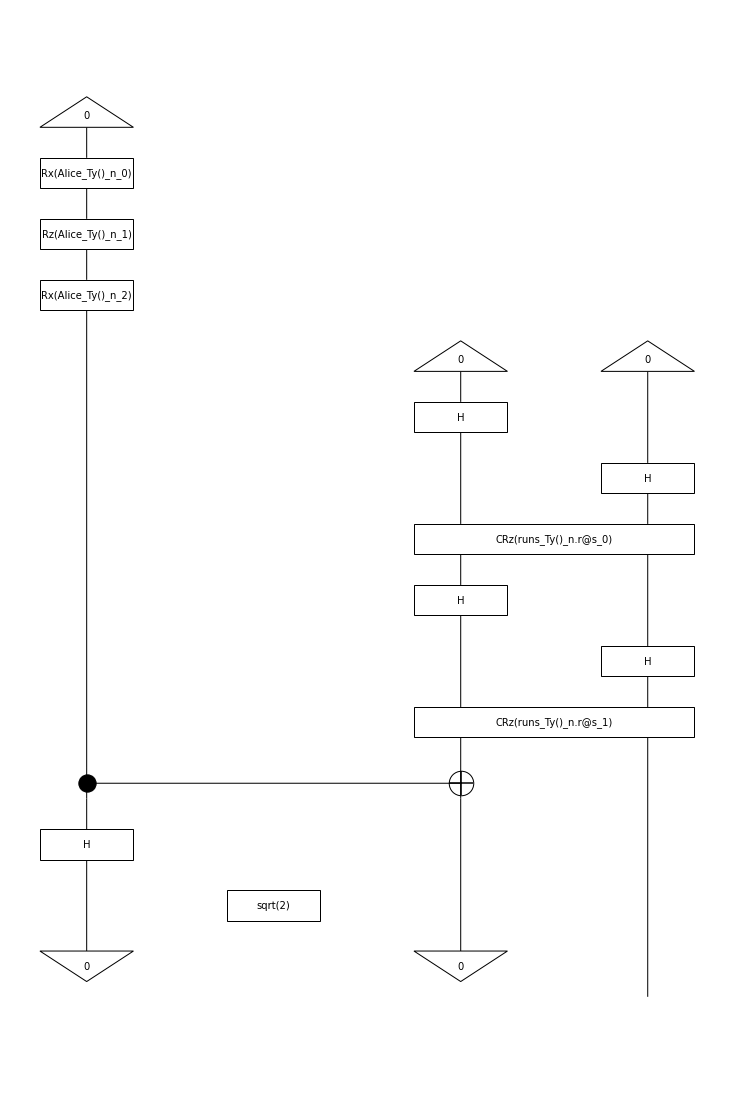

In [3]:
ansatz = IQPAnsatz({N: 1, S: 1}, n_layers=2)
discopy_circuit = ansatz.diagram2circuit(diagram)
discopy_circuit.draw(figsize=(10, 15))

In [4]:
tket_circuit = ansatz.diagram2tket(diagram)
assert tket_circuit == discopy_circuit.to_tk()

render_circuit_jupyter(tket_circuit)

In [5]:
from sympy import default_sort_key

# Make sure you sort your symbols as they are returned as a set.
parameters = sorted(tket_circuit.free_symbols(), key=default_sort_key)

param_dict = {p: i * 0.001 for i, p in enumerate(parameters)}
param_dict

{Alice_Ty()_n_0: 0.0,
 Alice_Ty()_n_1: 0.001,
 Alice_Ty()_n_2: 0.002,
 runs_Ty()_n.r@s_0: 0.003,
 runs_Ty()_n.r@s_1: 0.004}

In [6]:
tket_circuit.symbol_substitution(param_dict)
render_circuit_jupyter(tket_circuit)